<a href="https://colab.research.google.com/github/Navitha22007/Cleaning-the-raw-dataset/blob/main/Cleaning_the_weather_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import files

# STEP 0: Upload the CSV file manually in Colab
print("Please upload 'data.csv' file now...")
uploaded = files.upload()  # This will prompt you to upload the file

# ================================
# 1. LOAD DATA
# ================================
df = pd.read_csv("raw_weather_energy_dataset.csv")

# ================================
# 2. FIX TIMESTAMP
# ================================
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp")
df = df.set_index("timestamp")

# ================================
# 3. HANDLE MISSING VALUES
# ================================
df.interpolate(method="time", inplace=True)

# ================================
# 4. REMOVE PHYSICALLY IMPOSSIBLE VALUES
# ================================
df.loc[(df["temperature_C"] < -10) | (df["temperature_C"] > 60), "temperature_C"] = np.nan
df.loc[(df["humidity_%"] < 0) | (df["humidity_%"] > 100), "humidity_%"] = np.nan
df.loc[(df["pressure_hPa"] < 900) | (df["pressure_hPa"] > 1100), "pressure_hPa"] = np.nan
df.loc[(df["wind_speed_mps"] < 0) | (df["wind_speed_mps"] > 35), "wind_speed_mps"] = np.nan
df.loc[(df["solar_irradiance_Wm2"] < 0) | (df["solar_irradiance_Wm2"] > 1200), "solar_irradiance_Wm2"] = np.nan
df.loc[df["solar_power_MW"] < 0, "solar_power_MW"] = np.nan
df.loc[df["wind_power_MW"] < 0, "wind_power_MW"] = np.nan

# ================================
# 5. INTERPOLATE AGAIN
# ================================
df.interpolate(method="time", inplace=True)

# ================================
# 6. IQR OUTLIER CAPPING
# ================================
def cap_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return series.clip(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

for col in df.columns:
    df[col] = cap_iqr(df[col])

# ================================
# 7. PCA
# ================================
weather_features = ["temperature_C", "humidity_%", "pressure_hPa"]

scaler = StandardScaler()
weather_scaled = scaler.fit_transform(df[weather_features])

pca = PCA(n_components=2)
pcs = pca.fit_transform(weather_scaled)

df["PC1"] = pcs[:, 0]
df["PC2"] = pcs[:, 1]

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# ================================
# 8. SAVE CLEANED DATA
# ================================
df.reset_index().to_csv("cleaned_weather_energy_dataset.csv", index=False)

# ================================
# 9. SHOW CLEANED DATASET
# ================================
display(df.reset_index())



Please upload 'data.csv' file now...


Saving raw_weather_energy_dataset.csv to raw_weather_energy_dataset (6).csv
Explained Variance Ratio: [0.37390932 0.3165092 ]


,timestamp,temperature_C,humidity_%,pressure_hPa,wind_speed_mps,solar_irradiance_Wm2,solar_power_MW,wind_power_MW,PC1,PC2
0,2023-01-01 00:00:00,28.973713,78.523551,1033.990332,8.335083,297.446518,48.559195,7.106309,1.055347,1.206762
1,2023-01-01 01:00:00,23.893886,98.188333,1026.869505,4.346443,456.644399,54.522770,19.675380,1.830263,0.321253
2,2023-01-01 02:00:00,30.181508,32.028649,1013.894456,3.545403,262.274024,35.030374,25.036734,-1.327134,0.536066
3,2023-01-01 03:00:00,37.184239,71.259385,1003.295948,5.989877,407.611541,30.816449,52.652252,-0.922464,0.380612
4,2023-01-01 04:00:00,23.126773,46.987149,1023.473350,5.489446,485.799827,23.722742,36.678637,0.048791,0.353034
...,...,...,...,...,...,...,...,...,...,...
495,2023-01-21 15:00:00,29.311280,54.377994,1043.091393,9.210451,743.961556,41.162208,53.221848,0.555369,1.820091
496,2023-01-21 16:00:00,16.702031,95.953731,1043.922554,5.920436,416.311121,43.866288,39.786012,2.914628,0.593606
497,2023-01-21 17:00:00,23.477291,72.816857,1031.125493,3.354376,416.071949,21.373591,29.422938,1.167784,0.633618
498,2023-01-21 18:00:00,17.995054,48.576420,1028.360938,5.510799,737.111569,45.012646,27.802194,0.662390,0.163406


In [12]:
files.download("cleaned_weather_energy_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

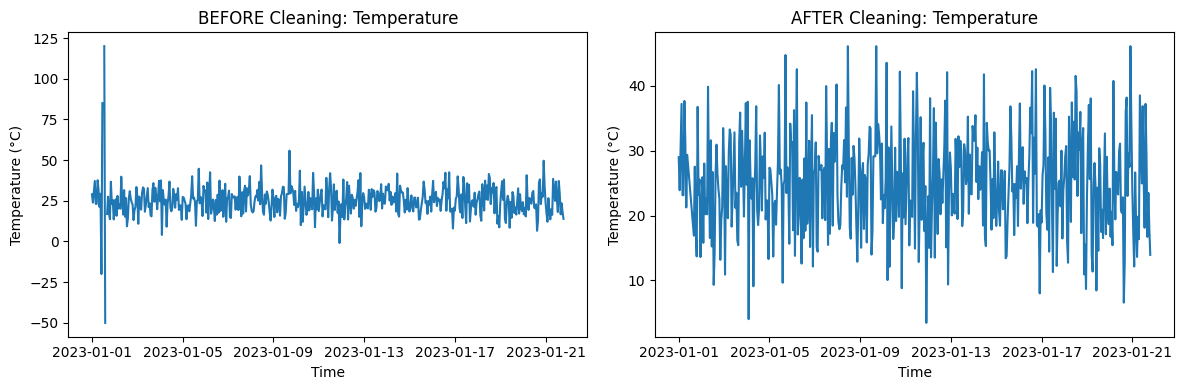

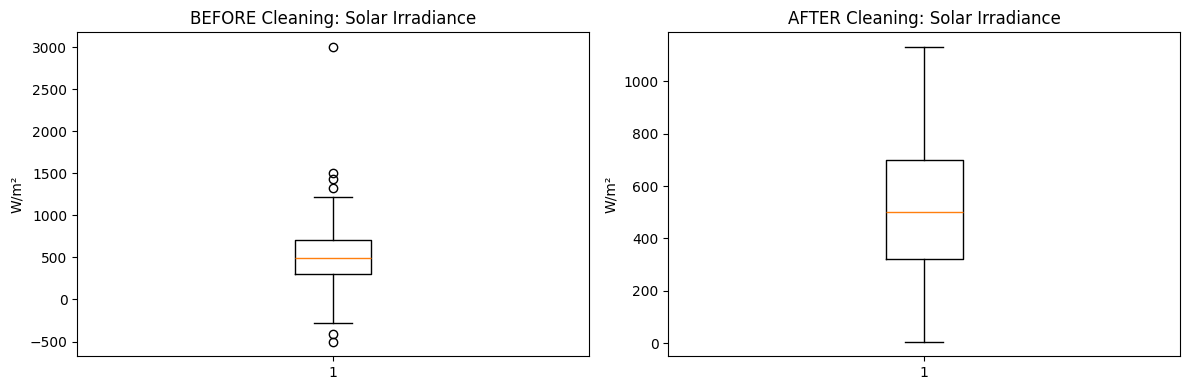

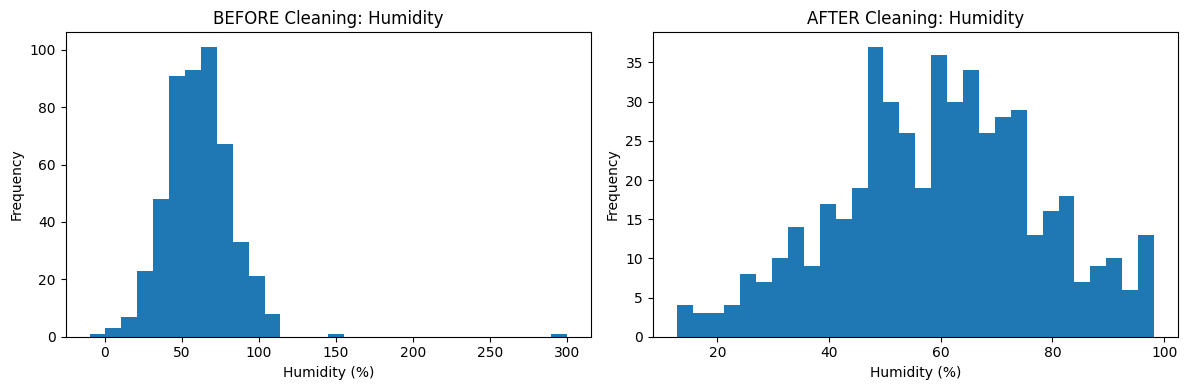

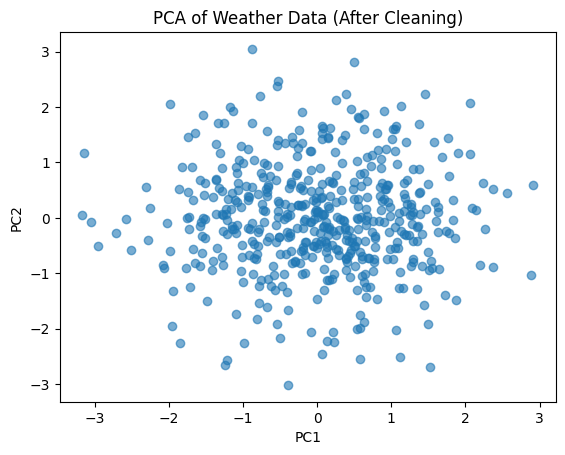

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
raw = pd.read_csv("raw_weather_energy_dataset.csv")
clean = pd.read_csv("cleaned_weather_energy_dataset.csv")

raw["timestamp"] = pd.to_datetime(raw["timestamp"])
clean["timestamp"] = pd.to_datetime(clean["timestamp"])

# ================================
# 1. TEMPERATURE: Before vs After
# ================================
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(raw["timestamp"], raw["temperature_C"])
plt.title("BEFORE Cleaning: Temperature")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")

plt.subplot(1,2,2)
plt.plot(clean["timestamp"], clean["temperature_C"])
plt.title("AFTER Cleaning: Temperature")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")

plt.tight_layout()
plt.show()

# ================================
# 2. SOLAR IRRADIANCE: Before vs After
# ================================
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.boxplot(raw["solar_irradiance_Wm2"].dropna())
plt.title("BEFORE Cleaning: Solar Irradiance")
plt.ylabel("W/m²")

plt.subplot(1,2,2)
plt.boxplot(clean["solar_irradiance_Wm2"].dropna())
plt.title("AFTER Cleaning: Solar Irradiance")
plt.ylabel("W/m²")

plt.tight_layout()
plt.show()

# ================================
# 3. HUMIDITY DISTRIBUTION
# ================================
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(raw["humidity_%"], bins=30)
plt.title("BEFORE Cleaning: Humidity")
plt.xlabel("Humidity (%)")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(clean["humidity_%"], bins=30)
plt.title("AFTER Cleaning: Humidity")
plt.xlabel("Humidity (%)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# ================================
# 4. PCA (After Cleaning Only)
# ================================
plt.figure()
plt.scatter(clean["PC1"], clean["PC2"], alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Weather Data (After Cleaning)")
plt.show()
